In [1]:
%matplotlib inline

In [2]:
from pylab import *

In [3]:
import pickle

In [4]:
def load(name):
    return pickle.load(open(name,'rb'), encoding='latin1')

In [5]:
fls = !ls
fls = list(filter(lambda fl: fl.endswith('.p'), fls))

In [7]:
len(fls)

180

In [9]:
res = {}
for fl in fls:
    (p,(w_end, w_endi, assigned_spikes, hertz_factor, patterns, spike_counts, N_presentations, N_input,p1_ind, p2_ind)) = load(fl)
    arg = (p["neuron"]["r_max"], p["learn"]["eta"], p["group_size"], p["i"])
    res[arg] = (p,(w_end, w_endi, assigned_spikes, hertz_factor, patterns, spike_counts, N_presentations, N_input,p1_ind, p2_ind))


In [14]:
param_combs = list(set((a[0], a[1], a[2]) for a in res.keys()))

/home/dominik/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


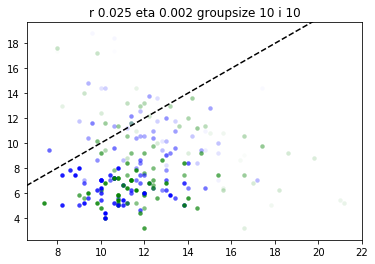

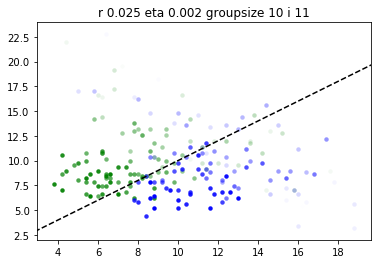

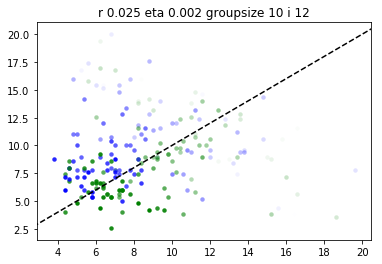

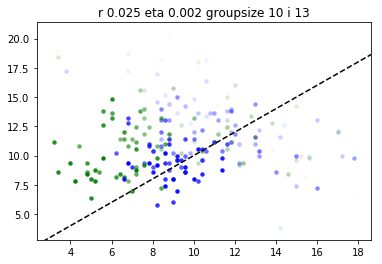

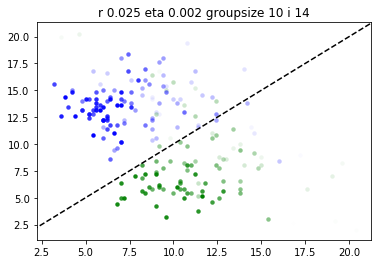

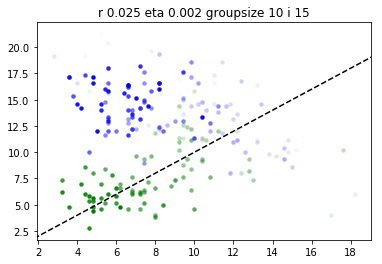

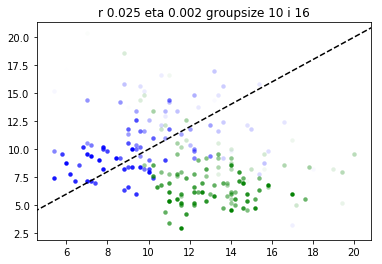

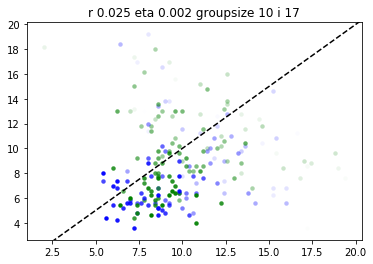

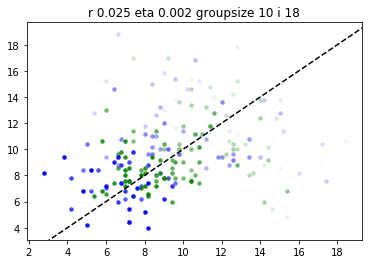

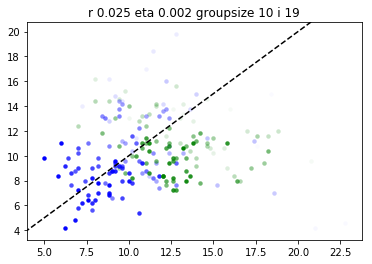

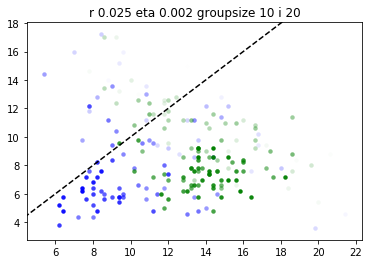

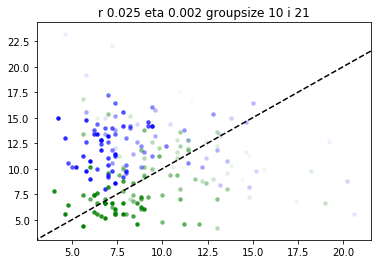

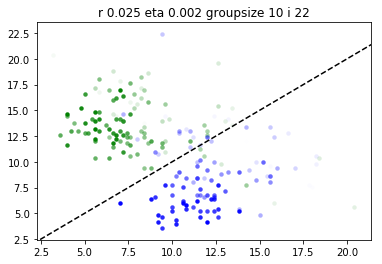

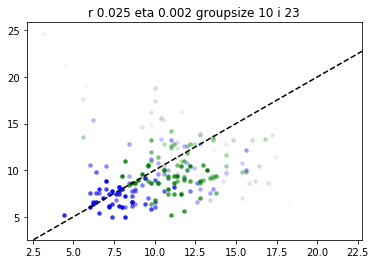

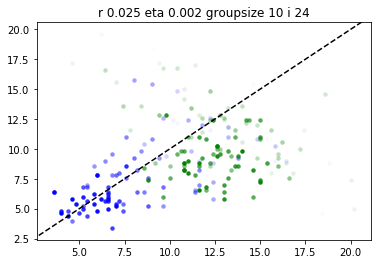

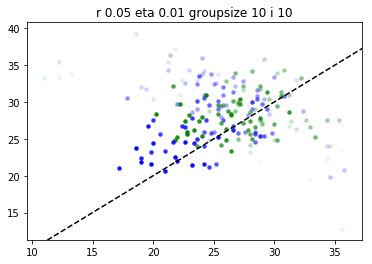

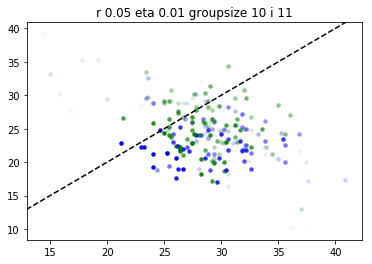

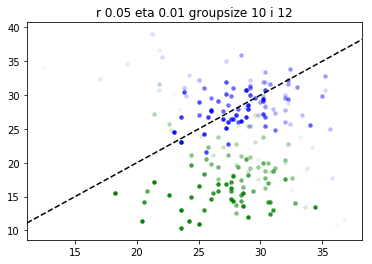

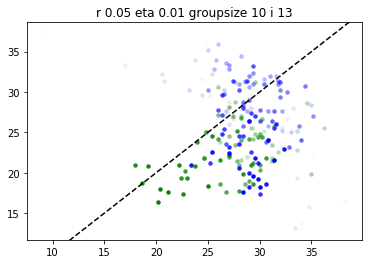

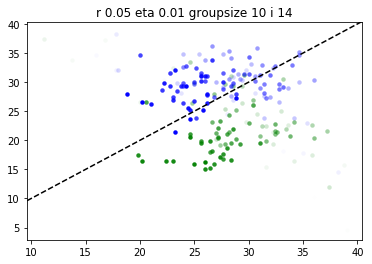

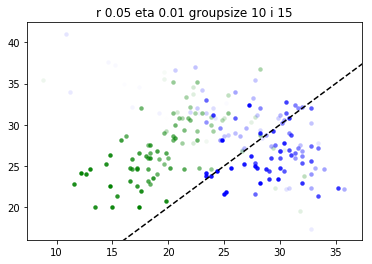

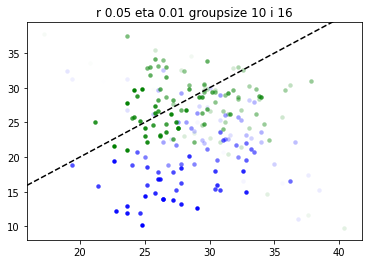

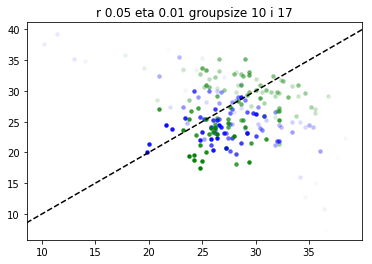

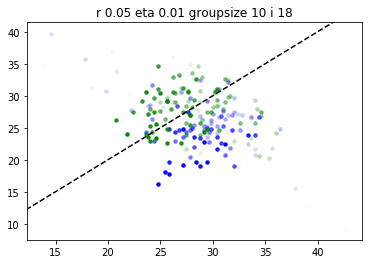

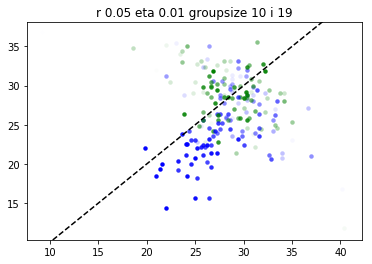

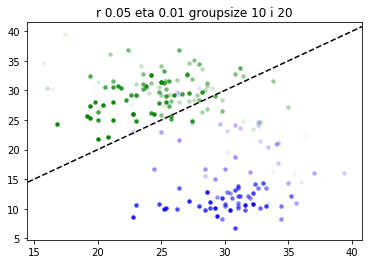

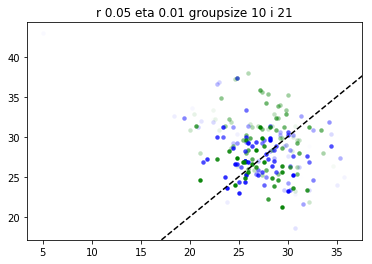

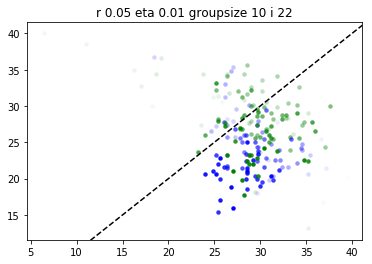

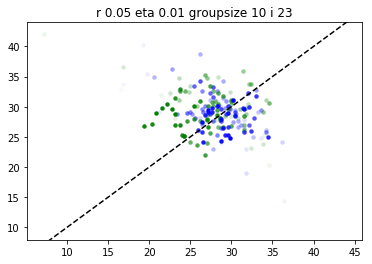

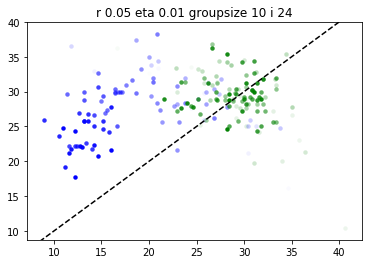

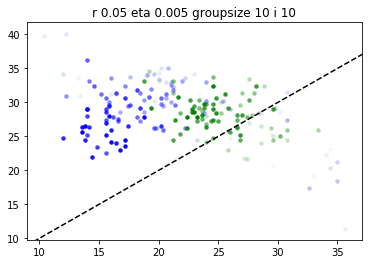

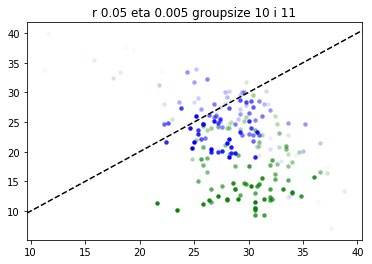

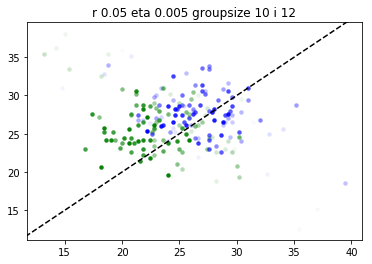

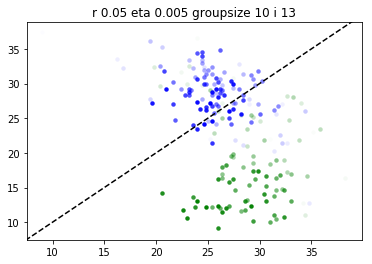

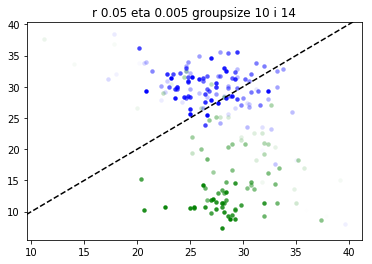

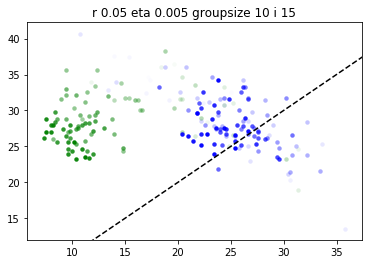

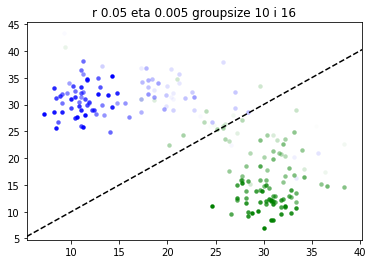

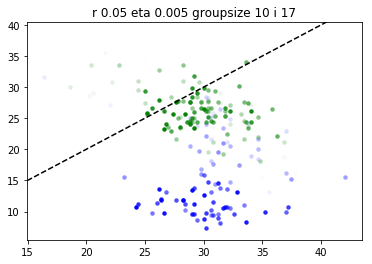

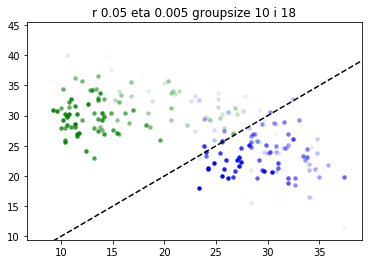

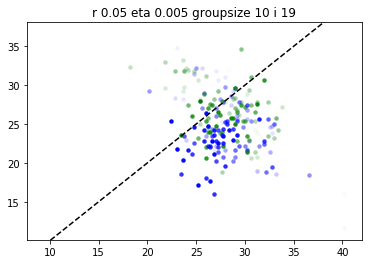

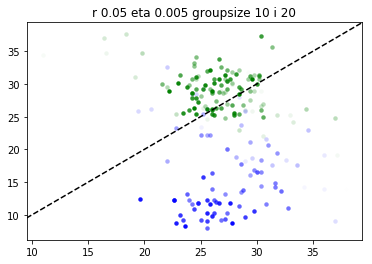

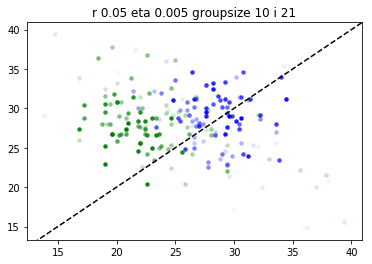

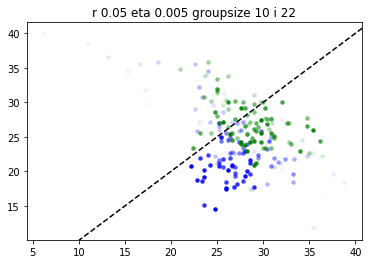

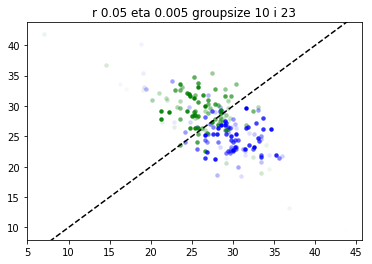

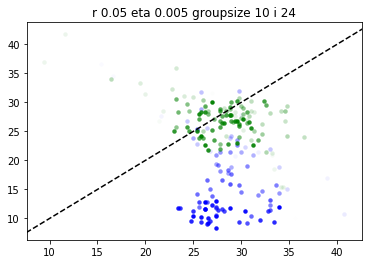

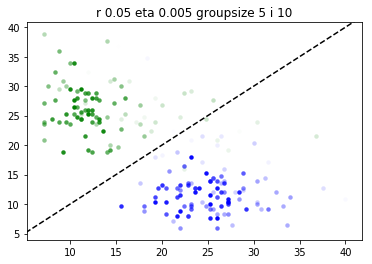

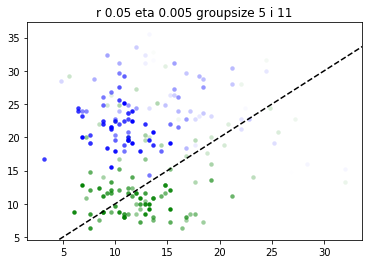

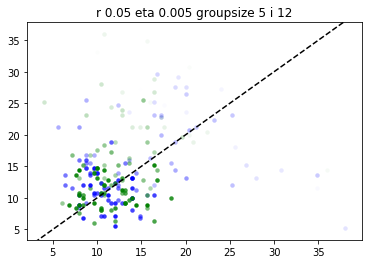

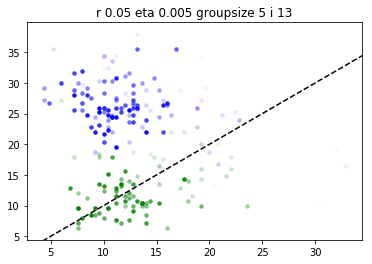

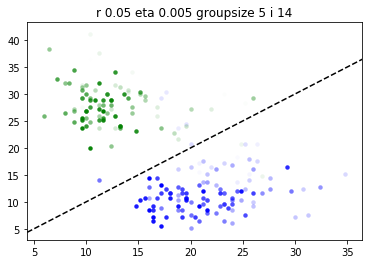

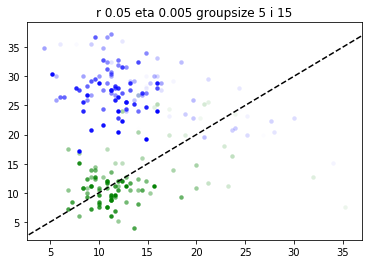

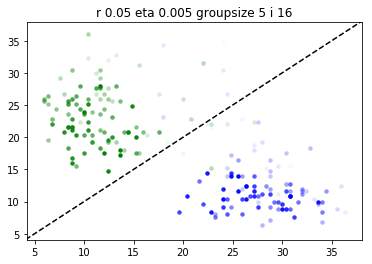

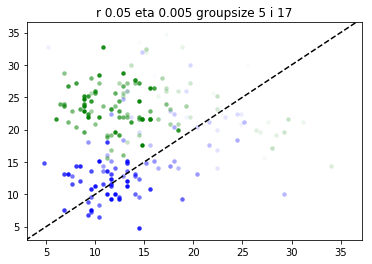

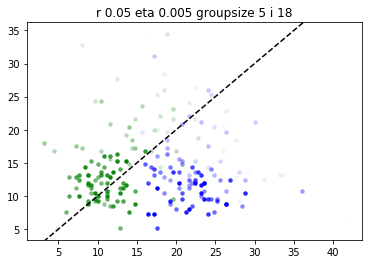

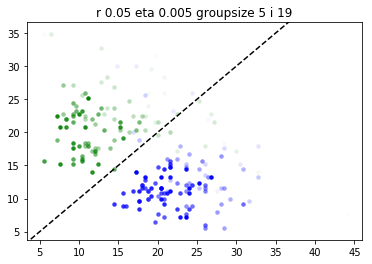

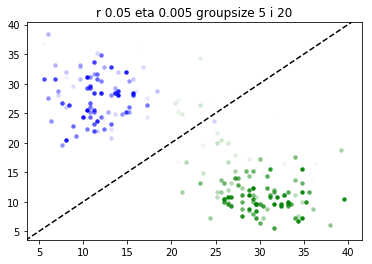

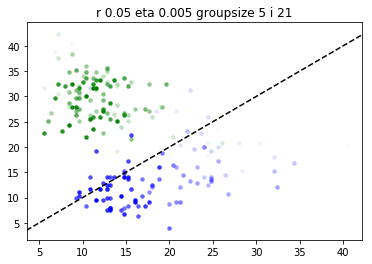

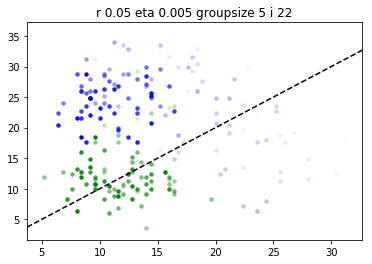

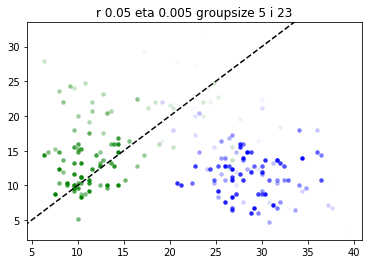

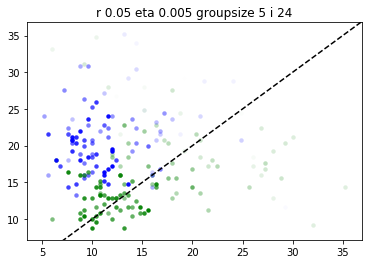

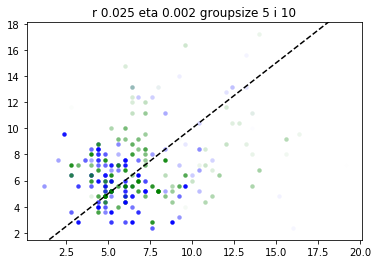

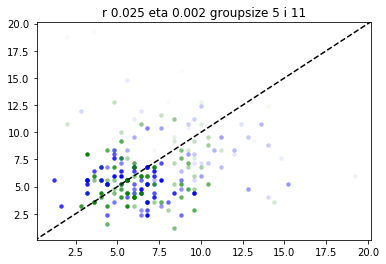

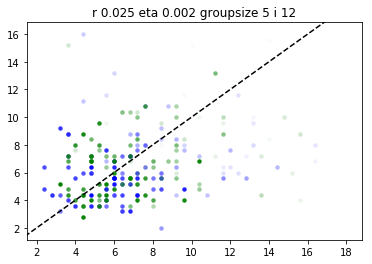

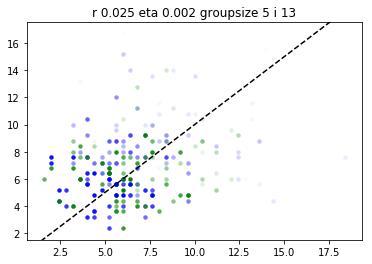

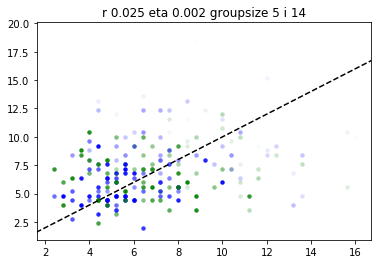

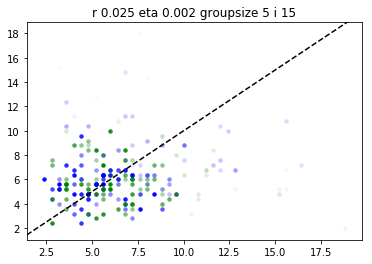

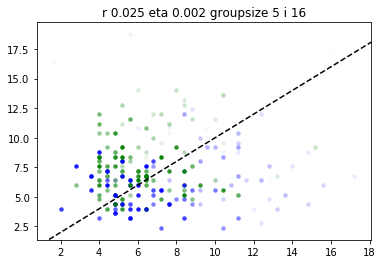

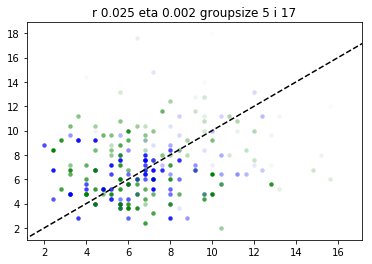

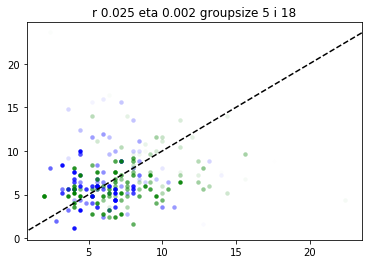

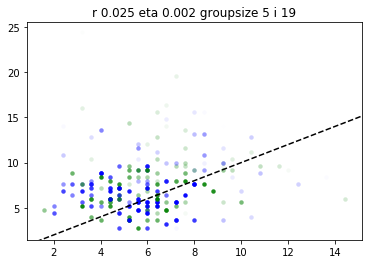

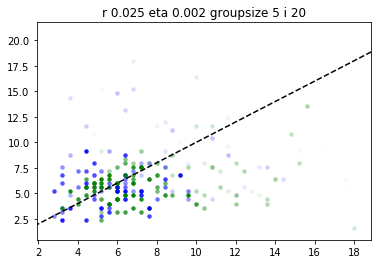

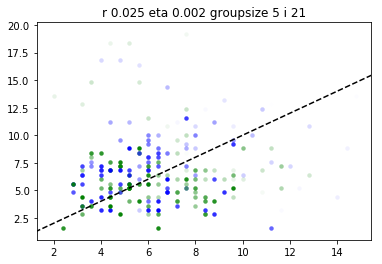

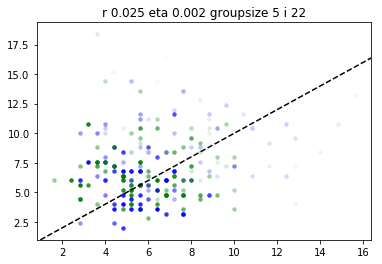

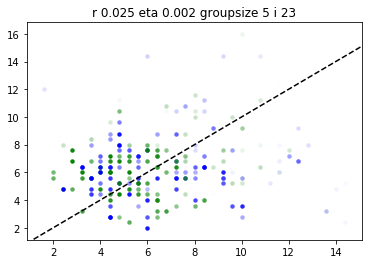

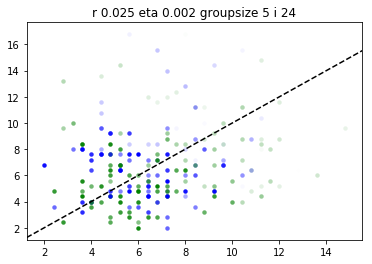

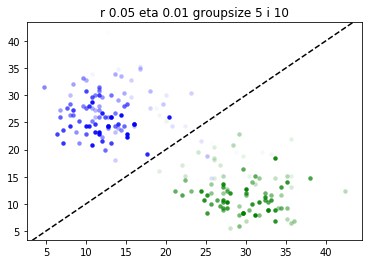

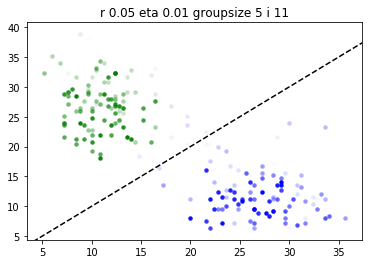

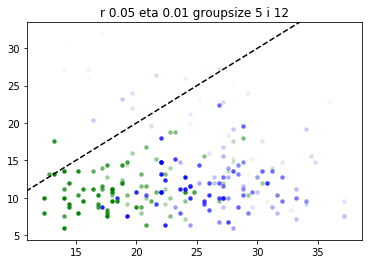

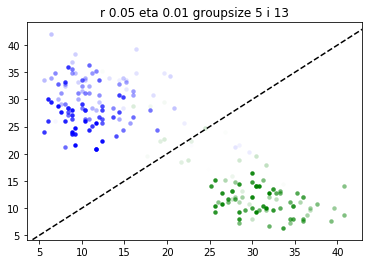

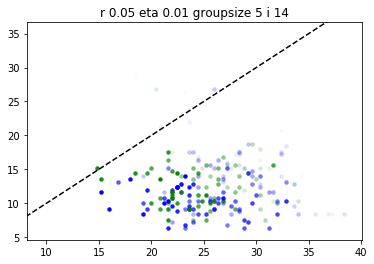

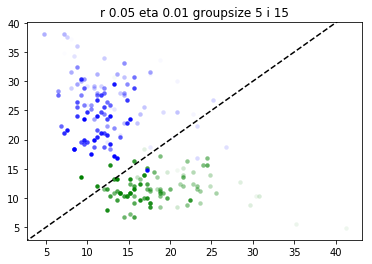

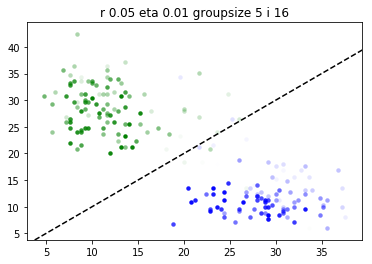

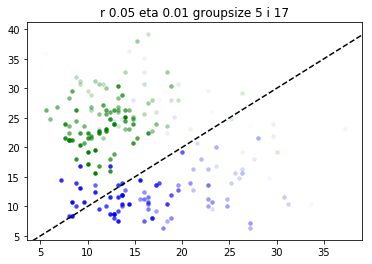

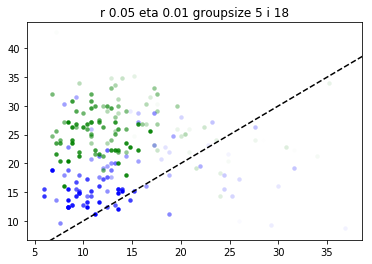

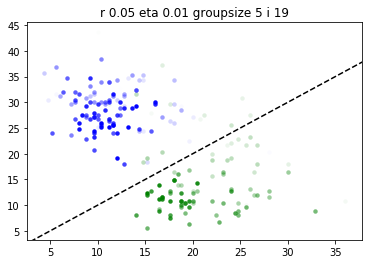

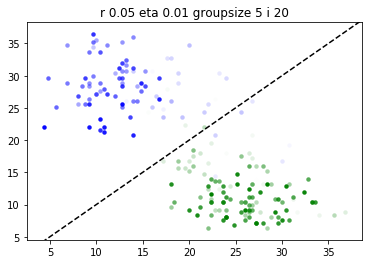

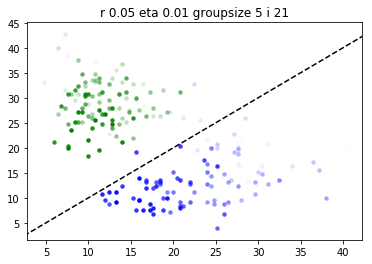

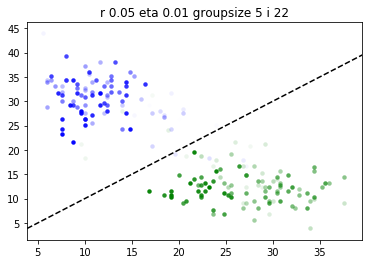

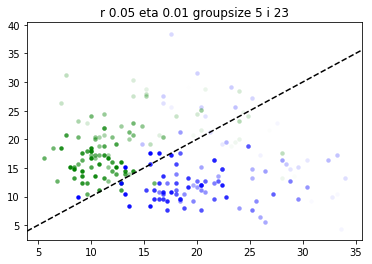

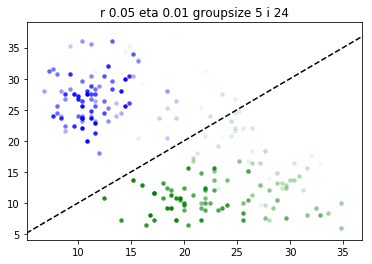

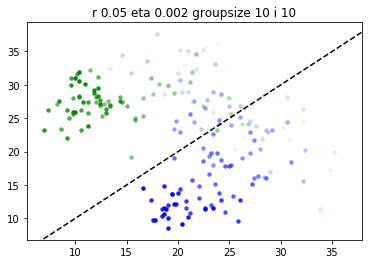

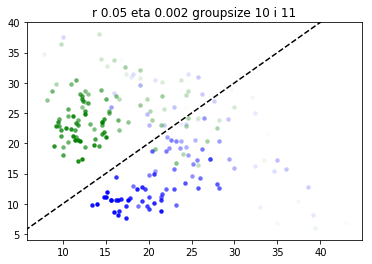

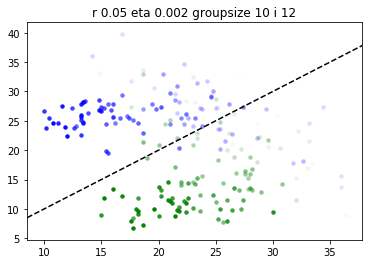

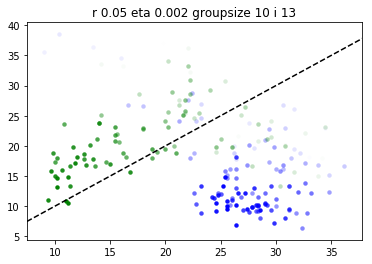

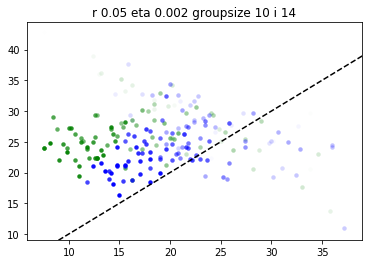

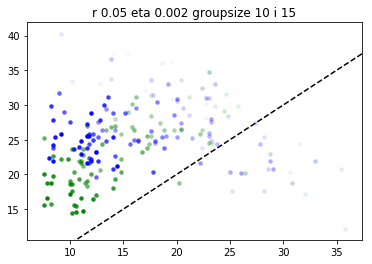

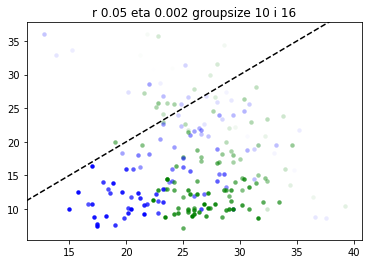

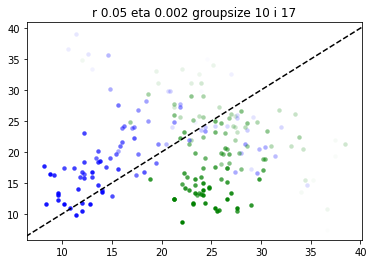

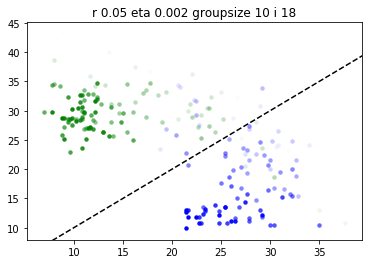

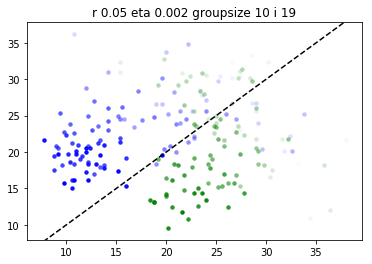

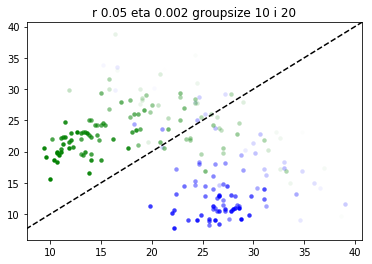

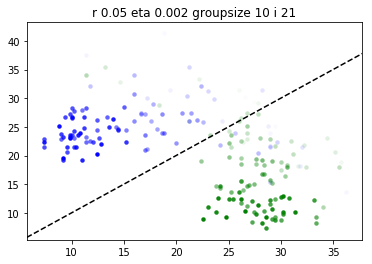

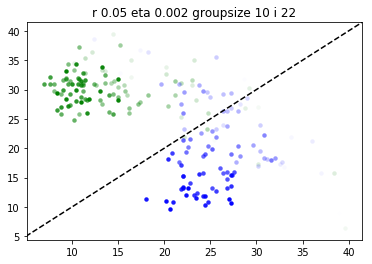

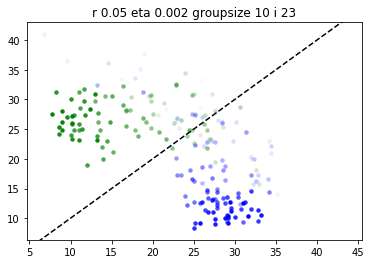

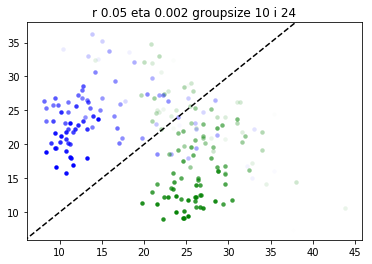

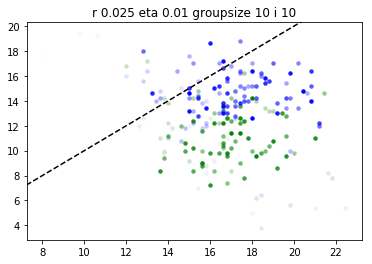

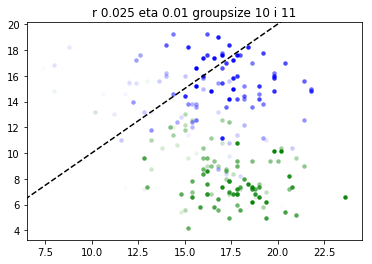

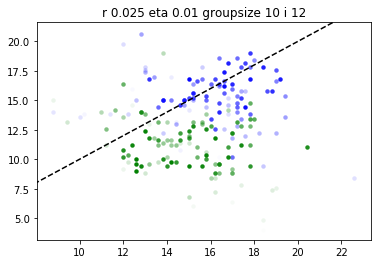

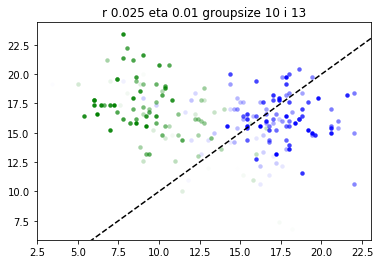

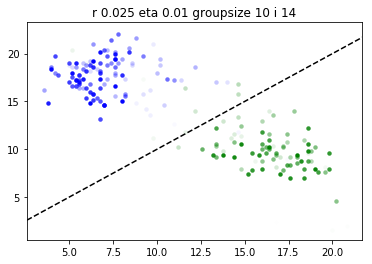

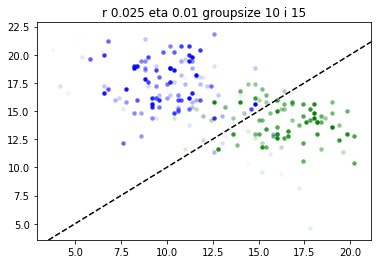

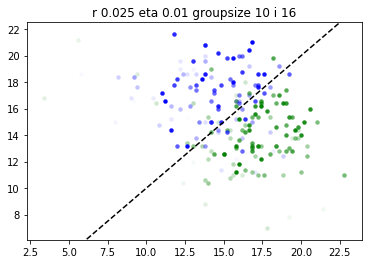

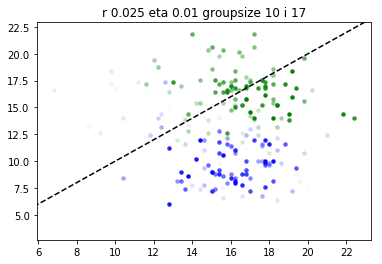

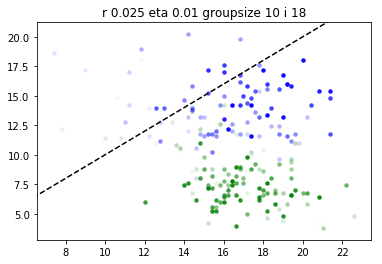

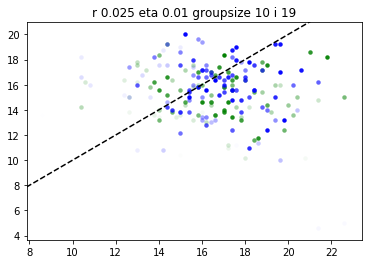

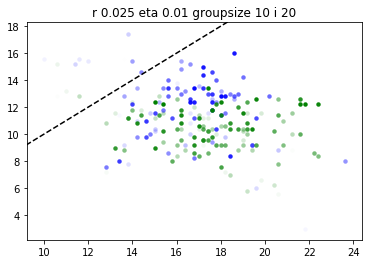

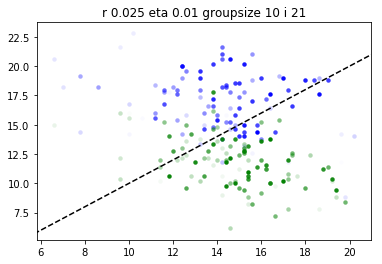

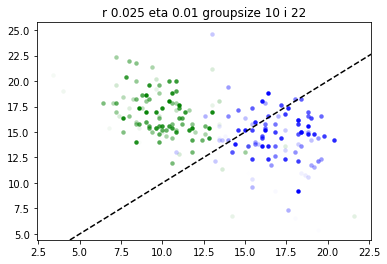

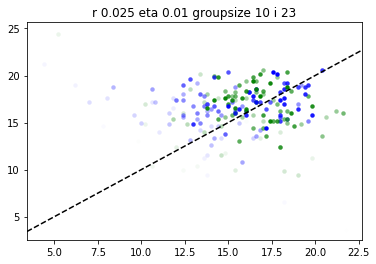

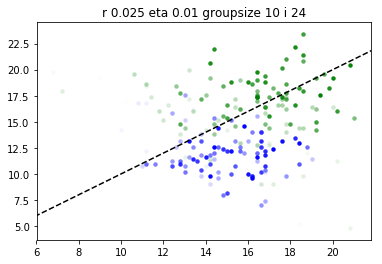

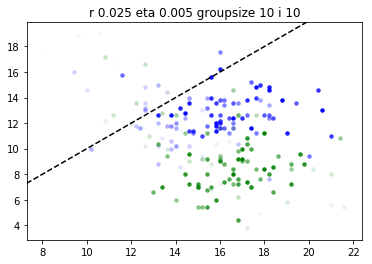

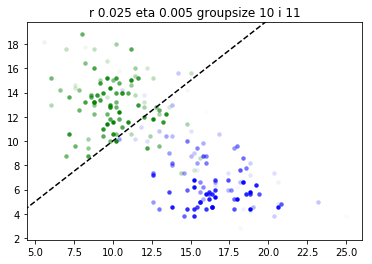

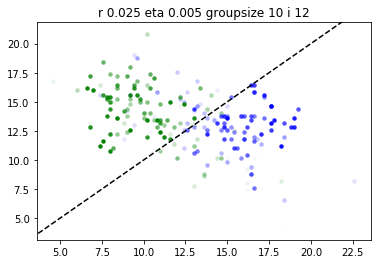

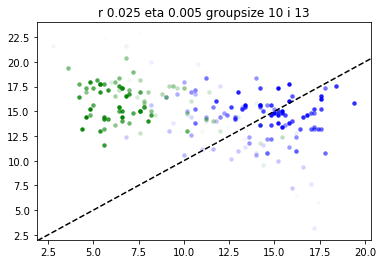

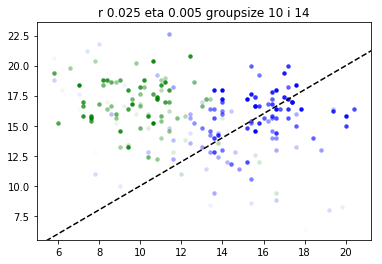

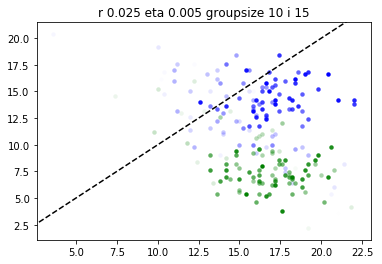

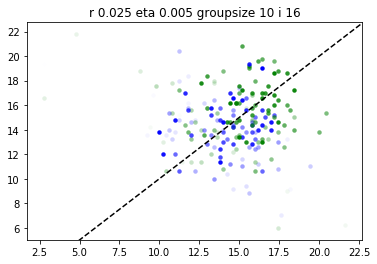

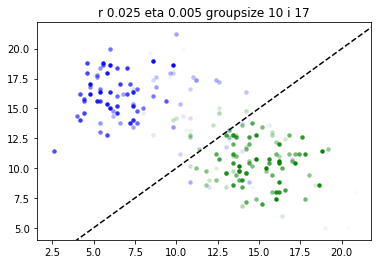

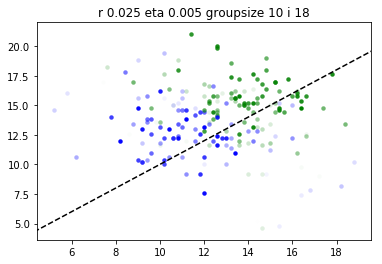

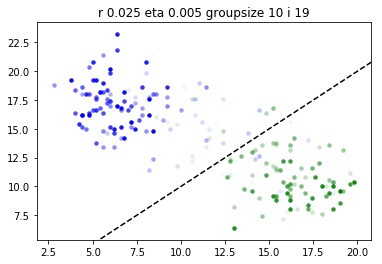

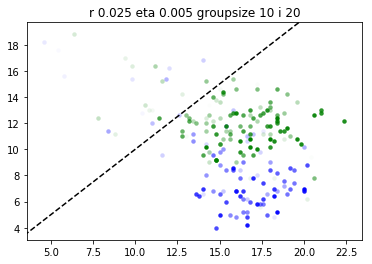

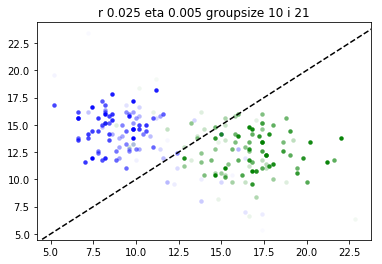

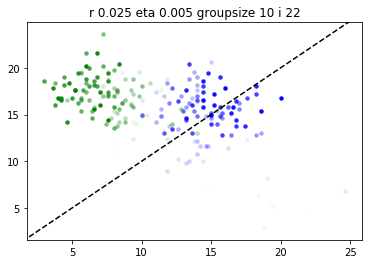

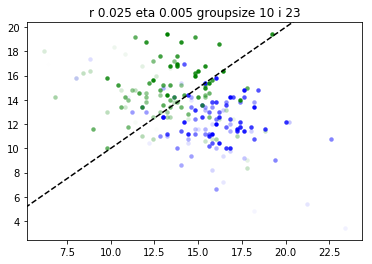

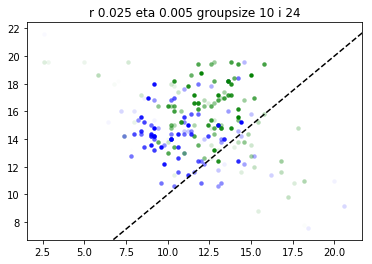

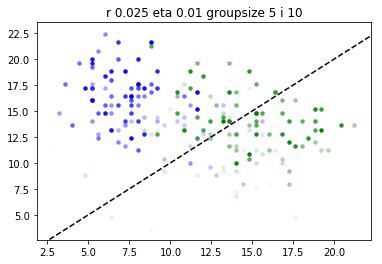

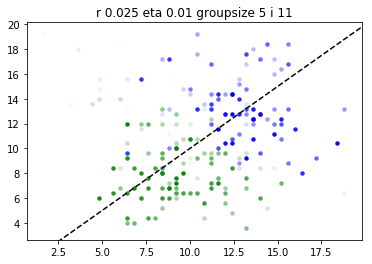

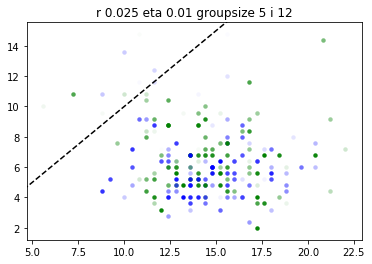

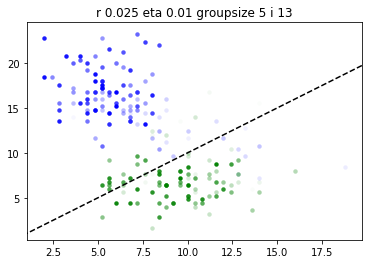

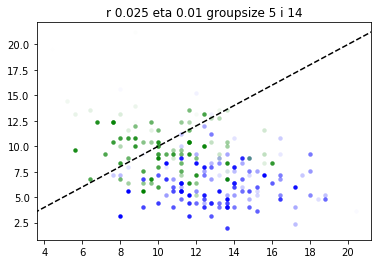

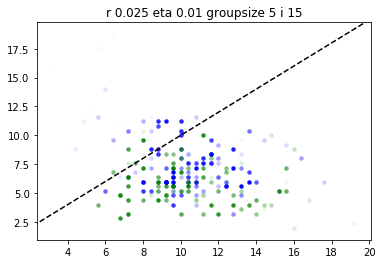

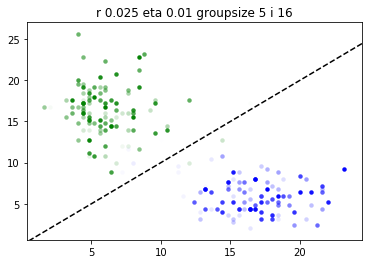

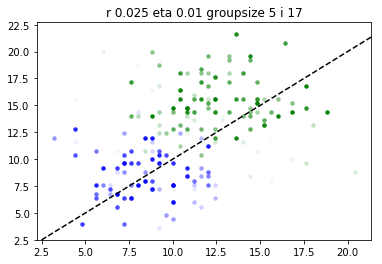

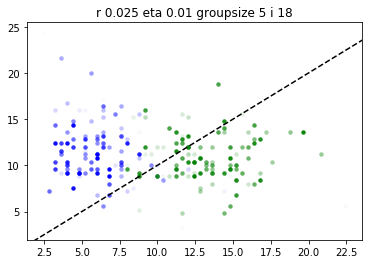

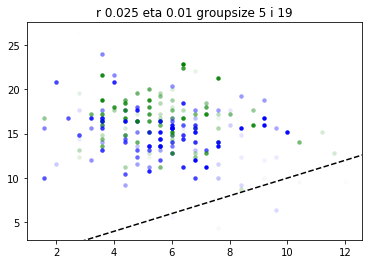

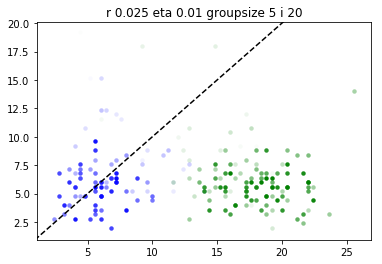

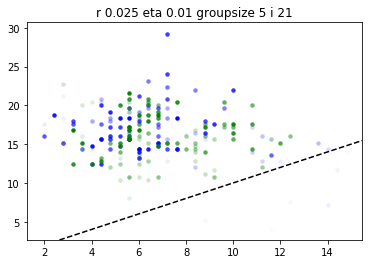

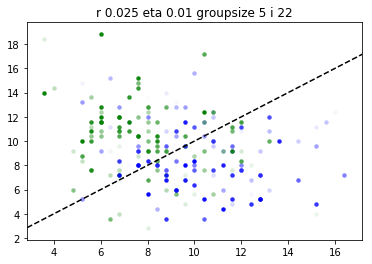

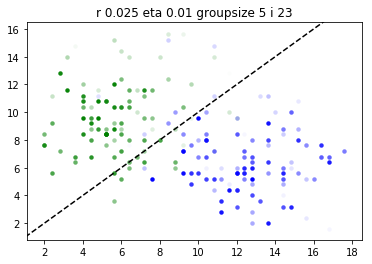

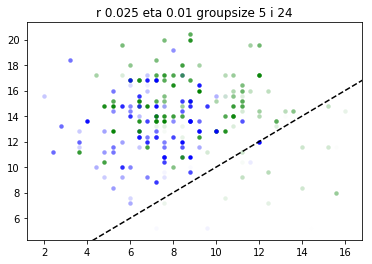

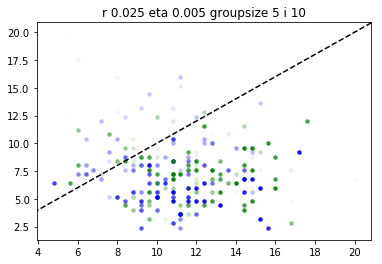

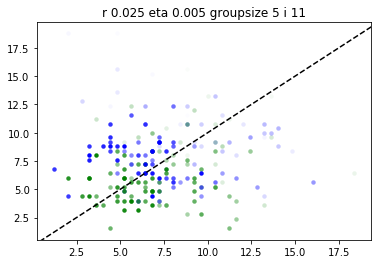

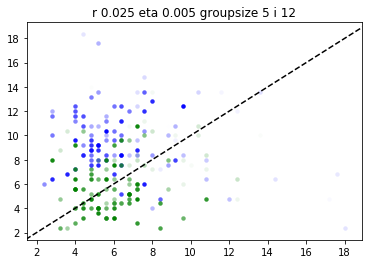

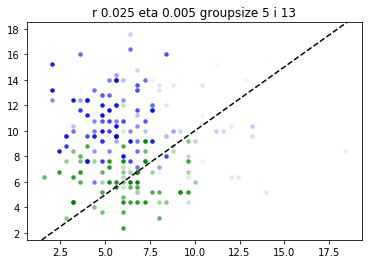

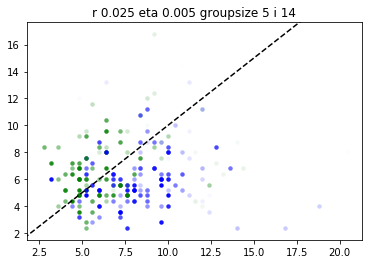

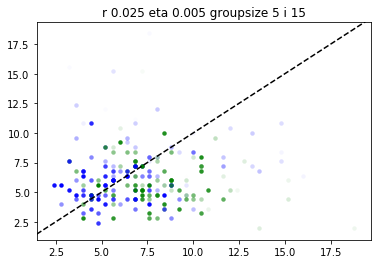

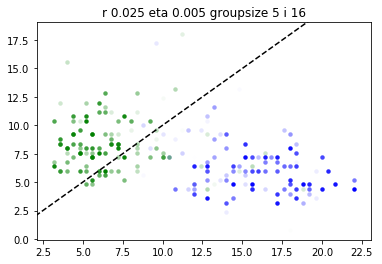

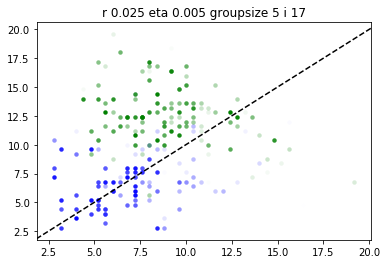

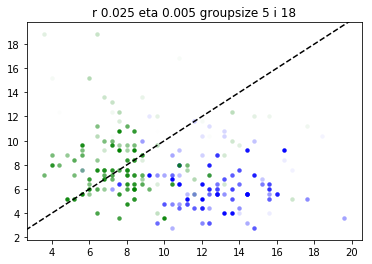

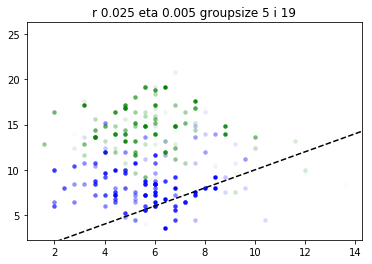

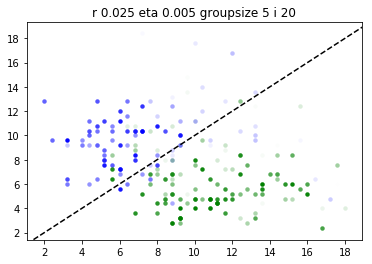

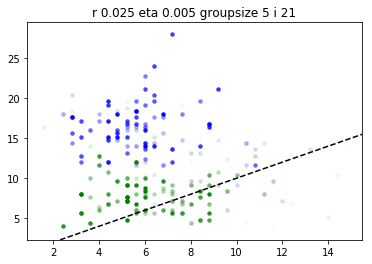

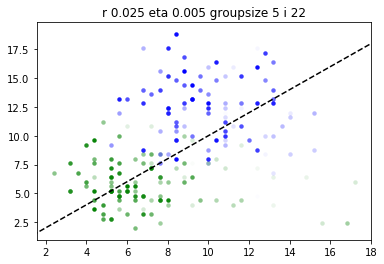

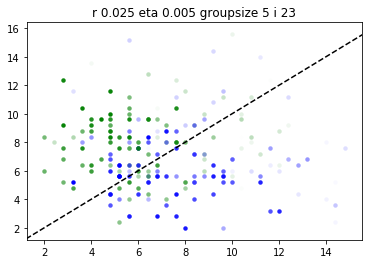

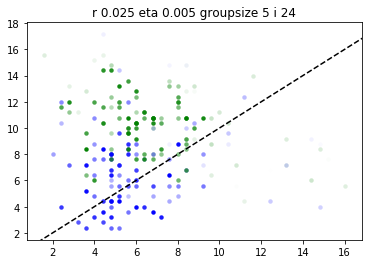

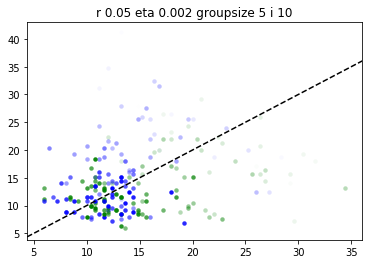

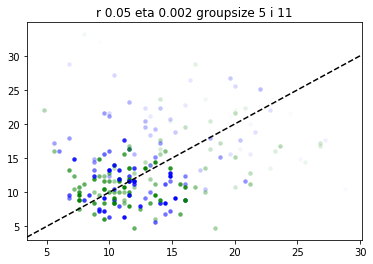

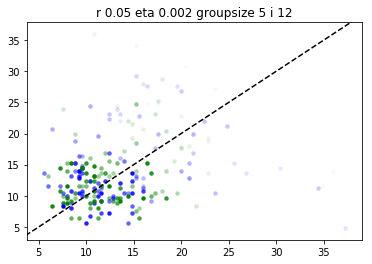

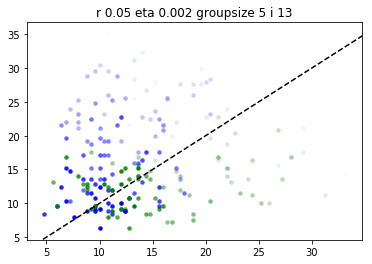

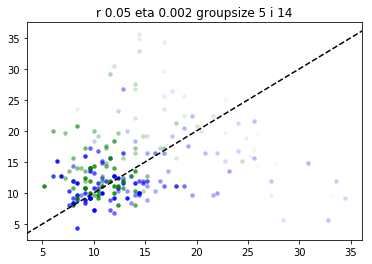

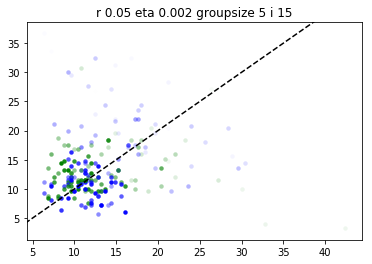

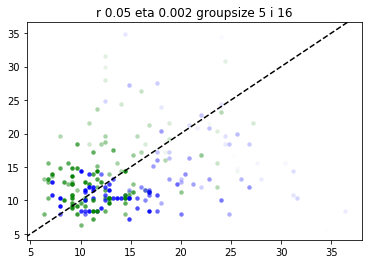

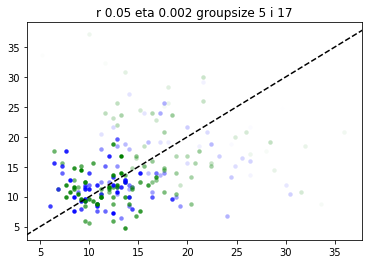

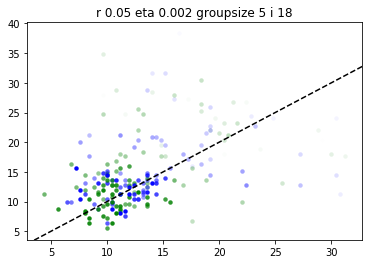

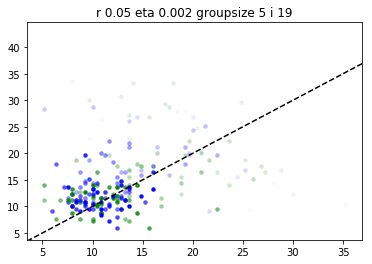

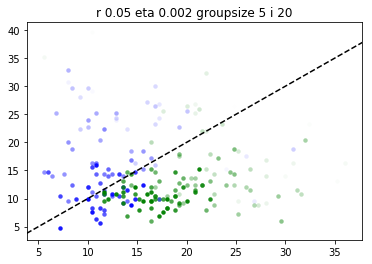

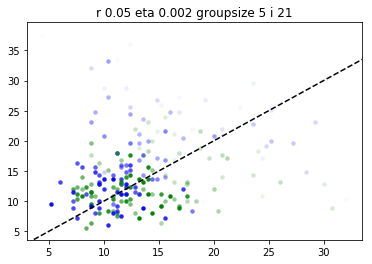

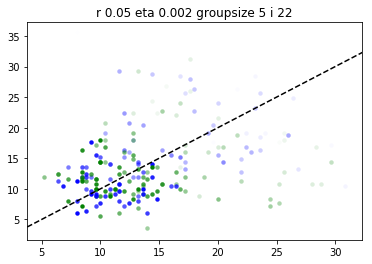

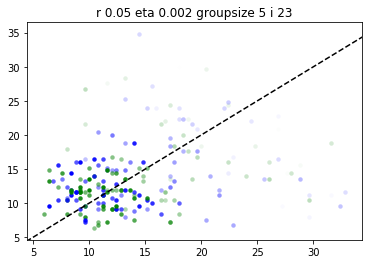

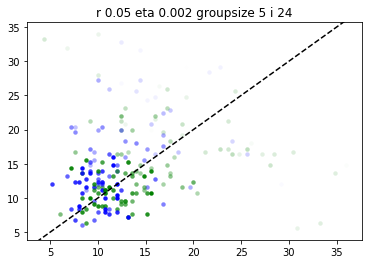

In [17]:
for param in param_combs:
    for i in range(10,25):
        k = param[0], param[1], param[2], i
        (p,(w_end, w_endi, assigned_spikes, hertz_factor, patterns, spike_counts, N_presentations, N_input,p1_ind, p2_ind)) = res[k]
        figure()
        colors = ["b", "g"]
        for idx, pat in enumerate(patterns):
            scatter(spike_counts[idx,0], spike_counts[idx,1], c=colors[pat], lw=0, s=20, alpha=1.0/N_presentations*(idx+1))
        xl, yl = xlim(), ylim()
        plot([0,1000], [0,1000], "k--")
        xlim(xl)
        ylim(yl)
        title('r {0} eta {1} groupsize {2} i {3}'.format(p["neuron"]["r_max"], p["learn"]["eta"], p["group_size"], i))